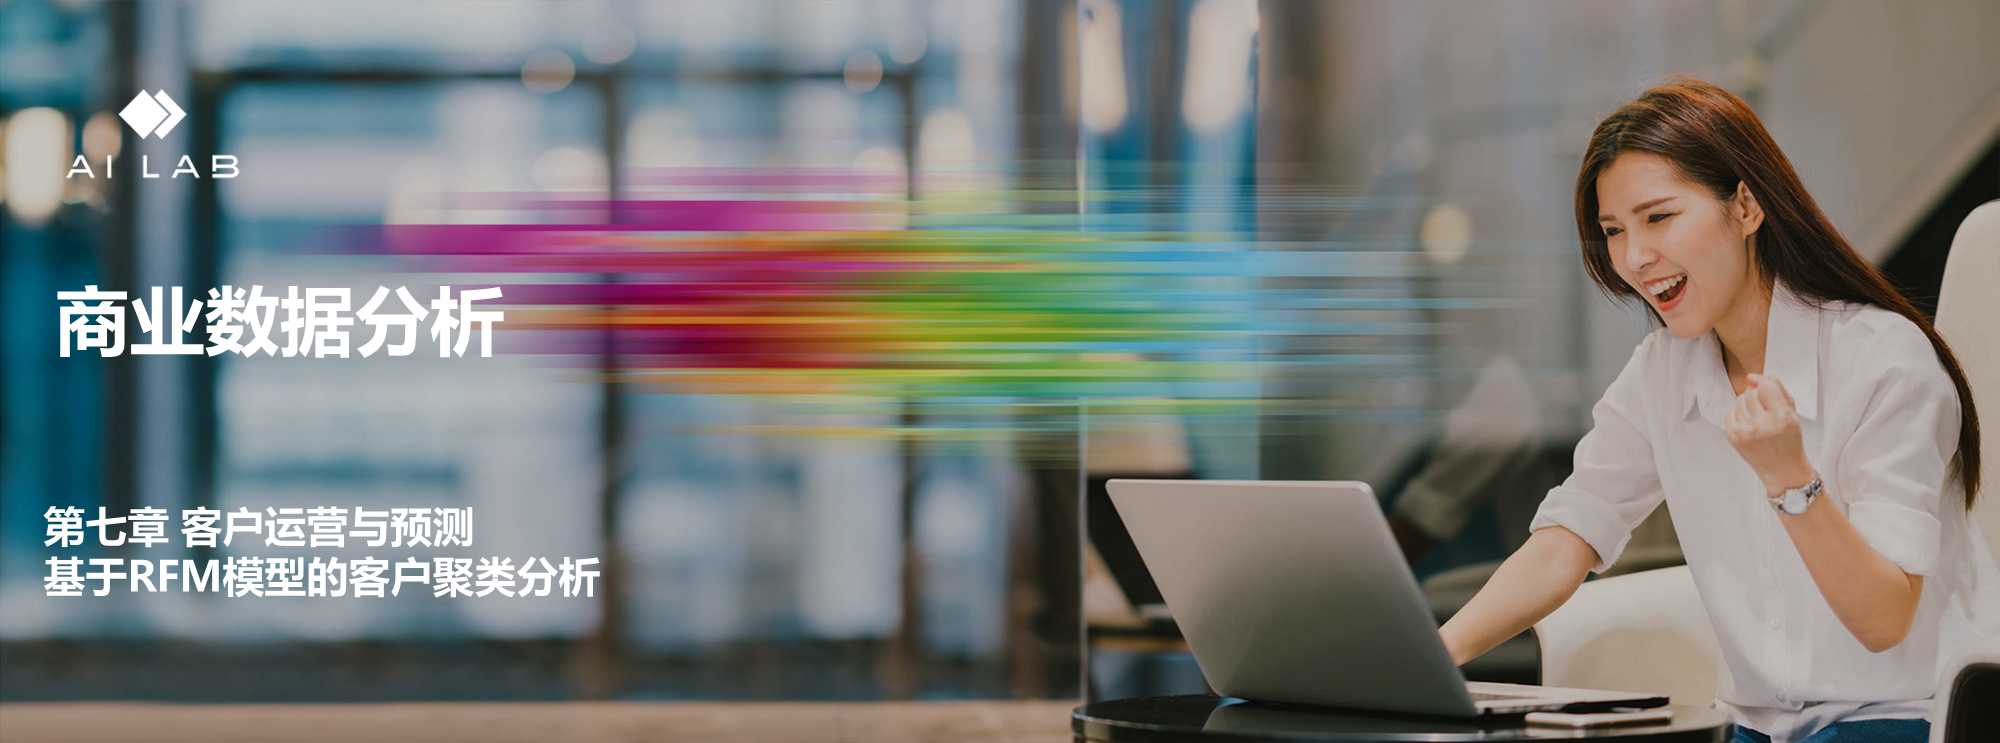

# 聚类分析

聚类分析通常被用作数据分析技术，用于发现数据中的有趣模式，例如基于其行为的客户群。有许多聚类算法可供选择，对于所有情况，没有单一的最佳聚类算法。聚类或聚类分析是无监督学习问题。

它通常被用作数据分析技术，用于发现数据中的有趣模式，例如基于其行为的客户群。

有许多聚类算法可供选择，对于所有情况，没有单一的最佳聚类算法。相反，最好探索一系列聚类算法以及每种算法的不同配置。

在本教程中，您将发现如何在 python 中安装和使用顶级聚类算法。

完成本教程后，您将知道：

聚类是在输入数据的特征空间中查找自然组的无监督问题。
对于所有数据集，有许多不同的聚类算法和单一的最佳方法。
在 scikit-learn 机器学习库的 Python 中如何实现、适配和使用顶级聚类算法。


## 聚类

聚类分析，即聚类，是一项无监督的机器学习任务。

它包括自动发现数据中的自然分组。与监督学习（类似预测建模）不同，聚类算法只解释输入数据，并在特征空间中找到自然组或群集。
聚类技术适用于没有要预测的类，而是将实例划分为自然组的情况。
—源自：《数据挖掘页：实用机器学习工具和技术》2016年。

群集通常是特征空间中的密度区域，其中来自域的示例（观测或数据行）比其他群集更接近群集。群集可以具有作为样本或点特征空间的中心(质心)，并且可以具有边界或范围。
这些群集可能反映出在从中绘制实例的域中工作的某种机制，这种机制使某些实例彼此具有比它们与其余实例更强的相似性。
—源自：《数据挖掘页：实用机器学习工具和技术》2016年。

聚类可以作为数据分析活动提供帮助，以便了解更多关于问题域的信息，即所谓的模式发现或知识发现。

例如：

该进化树可以被认为是人工聚类分析的结果；
将正常数据与异常值或异常分开可能会被认为是聚类问题；
根据自然行为将集群分开是一个集群问题，称为市场细分。

聚类还可用作特征工程的类型，其中现有的和新的示例可被映射并标记为属于数据中所标识的群集之一。

虽然确实存在许多特定于群集的定量措施，但是对所识别的群集的评估是主观的，并且可能需要领域专家。通常，聚类算法在人工合成数据集上与预先定义的群集进行学术比较，预计算法会发现这些群集。
聚类是一种无监督学习技术，因此很难评估任何给定方法的输出质量。
—源自：《机器学习页：概率观点》2012。


## 聚类算法


许多算法在特征空间中的示例之间使用相似度或距离度量，以发现密集的观测区域。因此，在使用聚类算法之前，扩展数据通常是良好的实践。
聚类分析的所有目标的核心是被群集的各个对象之间的相似程度（或不同程度）的概念。聚类方法尝试根据提供给对象的相似性定义对对象进行分组。
—源自：《统计学习的要素：数据挖掘、推理和预测》，2016年

一些聚类算法要求您指定或猜测数据中要发现的群集的数量，而另一些算法要求指定观测之间的最小距离，其中示例可以被视为“关闭”或“连接”。

因此，聚类分析是一个迭代过程，在该过程中，对所识别的群集的主观评估被反馈回算法配置的改变中，直到达到期望的或适当的结果。

scikit-learn 库提供了一套不同的聚类算法供选择。

下面列出了10种比较流行的算法：

亲和力传播

聚合聚类

BIRCH

DBSCAN

K-均值

Mini-Batch K-均值

Mean Shift

OPTICS

光谱聚类

高斯混合




### 聚类数据集

使用 make _ classification ()函数创建一个测试二分类数据集。数据集将有1000个示例，每个类有两个输入要素和一个群集。这些群集在两个维度上是可见的。因此,可以用散点图绘制数据，并通过指定的群集对图中的点进行颜色绘制。

群集基于多变量高斯，并非所有聚类算法都能有效地识别这些类型的群集。


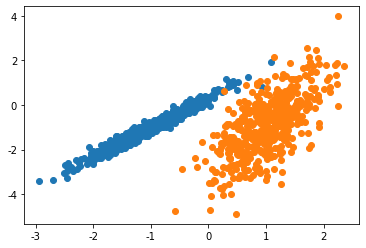

In [1]:
# 综合分类数据集
from numpy import where
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 定义数据集
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

for class_value in range(2):
    #获取此类的示例的行索引
    row_ix = where(y == class_value)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    # 绘制散点图
plt.show()
    

### 亲和力传播

亲和力传播包括找到一组最能概括数据的范例。
我们设计了一种名为“亲和传播”的方法，它作为两对数据点之间相似度的输入度量。在数据点之间交换实值消息，直到一组高质量的范例和相应的群集逐渐出现
—源自：《通过在数据点之间传递消息》2007。

它是通过 AffinityPropagation 类实现的，要调整的主要配置是将“ 阻尼 ”设置为0.5到1，甚至可能是“首选项”。

In [ ]:
# 亲和力传播聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = AffinityPropagation(damping=0.9)
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)


# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()


### 聚合聚类

聚合聚类涉及合并示例，直到达到所需的群集数量为止。

它是层次聚类方法的更广泛类的一部分，通过 AgglomerationClustering 类实现的，主要配置是“ n _ clusters ”集，这是对数据中的群集数量的估计，例如2。


In [ ]:
# 聚合聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = AgglomerativeClustering(n_clusters=2)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)


# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

### BIRCH

BIRCH 聚类（ BIRCH 是平衡迭代减少的缩写，聚类使用层次结构)包括构造一个树状结构，从中提取聚类质心。
BIRCH 递增地和动态地群集传入的多维度量数据点，以尝试利用可用资源（即可用内存和时间约束）产生最佳质量的聚类。
—源自：《 BIRCH ：1996年大型数据库的高效数据聚类方法》

它是通过 Birch 类实现的，主要配置是“ threshold ”和“ n _ clusters ”超参数，后者提供了群集数量的估计。

In [ ]:
# birch聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = Birch(threshold=0.01, n_clusters=2)
# 适配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)


# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

### DBSCAN

DBSCAN 聚类（其中 DBSCAN 是基于密度的空间聚类的噪声应用程序）涉及在域中寻找高密度区域，并将其周围的特征空间区域扩展为群集。
…我们提出了新的聚类算法 DBSCAN 依赖于基于密度的概念的集群设计，以发现任意形状的集群。DBSCAN 只需要一个输入参数，并支持用户为其确定适当的值
-源自：《基于密度的噪声大空间数据库聚类发现算法》，1996

它是通过 DBSCAN 类实现的，主要配置是“ eps ”和“ min _ samples ”超参数。

In [ ]:
# dbscan 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = DBSCAN(eps=0.30, min_samples=9)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)

# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

### K均值

K-均值聚类可以是最常见的聚类算法，并涉及向群集分配示例，以尽量减少每个群集内的方差。
本文的主要目的是描述一种基于样本将 N 维种群划分为 k 个集合的过程。这个叫做“ K-均值”的过程似乎给出了在类内方差意义上相当有效的分区。
-源自：《关于多元观测的分类和分析的一些方法》1967年。

它是通过 K-均值类实现的，要优化的主要配置是“ n _ clusters ”超参数设置为数据中估计的群集数量。


In [ ]:
# k-means 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = KMeans(n_clusters=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)

# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

### Mini-Batch K-均值

Mini-Batch K-均值是 K-均值的修改版本，它使用小批量的样本而不是整个数据集对群集质心进行更新，这可以使大数据集的更新速度更快，并且可能对统计噪声更健壮。
...我们建议使用 k-均值聚类的迷你批量优化。与经典批处理算法相比，这降低了计算成本的数量级，同时提供了比在线随机梯度下降更好的解决方案。
—源自：《Web-Scale K-均值聚类》2010

它是通过 MiniBatchKMeans 类实现的，要优化的主配置是“ n _ clusters ”超参数，设置为数据中估计的群集数量。



In [ ]:
# mini-batch k均值聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MiniBatchKMeans(n_clusters=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)

# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

### 均值漂移聚类

均值漂移聚类涉及到根据特征空间中的实例密度来寻找和调整质心。
对离散数据证明了递推平均移位程序收敛到最接近驻点的基础密度函数，从而证明了它在检测密度模式中的应用。
—源自：《Mean Shift ：面向特征空间分析的稳健方法》，2002

它是通过 MeanShift 类实现的，主要配置是“带宽”超参数。

In [ ]:
# 均值漂移聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MeanShift()
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)

# 散点图可视化
for cluster in clusters:
    #获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

### OPTICS

OPTICS 聚类（ OPTICS 短于订购点数以标识聚类结构）是上述 DBSCAN 的修改版本。
我们为聚类分析引入了一种新的算法，它不会显式地生成一个数据集的聚类；而是创建表示其基于密度的聚类结构的数据库的增强排序。此群集排序包含相当于密度聚类的信息，该信息对应于范围广泛的参数设置。
—源自：《OPTICS ：排序点以标识聚类结构》，1999

它是通过 OPTICS 类实现的，主要配置是“ eps ”和“ min _ samples ”超参数。

In [ ]:
# optics聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = OPTICS(eps=0.8, min_samples=10)

# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)

# 散点图可视化
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
plt.show()

#  RFM模型用户价值分层


在企业真实的业务场景中，数据化运营包括会员(用户)数据化运营、商品数据化运营、流量数据化运营、内容数据化运营等四个主要方面。会员(用户)价值分析是其中最重要的数据分析应用之一。在销售型公司，对订单交易尤为关注，因此基于订单交易的价值度模型将更适合运营需求。

本节内容介绍用Python实现将销售数据进行数据进行RFM模型计算的过程，并进行简要可视化分析。


## 用户价值分析与RFM模型

会员价值度模型，即评估用户的价值情况，是区分会员价值的重要模型和参考依据，也是衡量不同营销效果的关键指标之一。价值度模型一般基于交易行为产生，衡量的是有实体转化价值的行为。

根据美国数据库营销研究所Arthur Hughes的研究，客户数据库中有三个神奇的要素:

R（Recency）：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则表示客户交易发生的日期越近。

F（Frequency）：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。

M（Monetary）：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。

通过这三个要素构建RFM模型来评估客户价值，作为衡量客户价值和客户创利能力的重要工具和手段。在众多的客户关系管理(CRM)的分析模式中，RFM模型是被广泛提到的。


RFM模型中消费金额“M”处于支柱地位，当“R”，“F”，“M”都处于平均值以上的时候，此客户为重要价值客户，当“R”，“F”处于平均值以下，但是“M”处于平均值以上的时候，此客户为重要挽留客户。（“↑”表示大于均值，“↓”表示小于均值）如下图所示:

<div>
    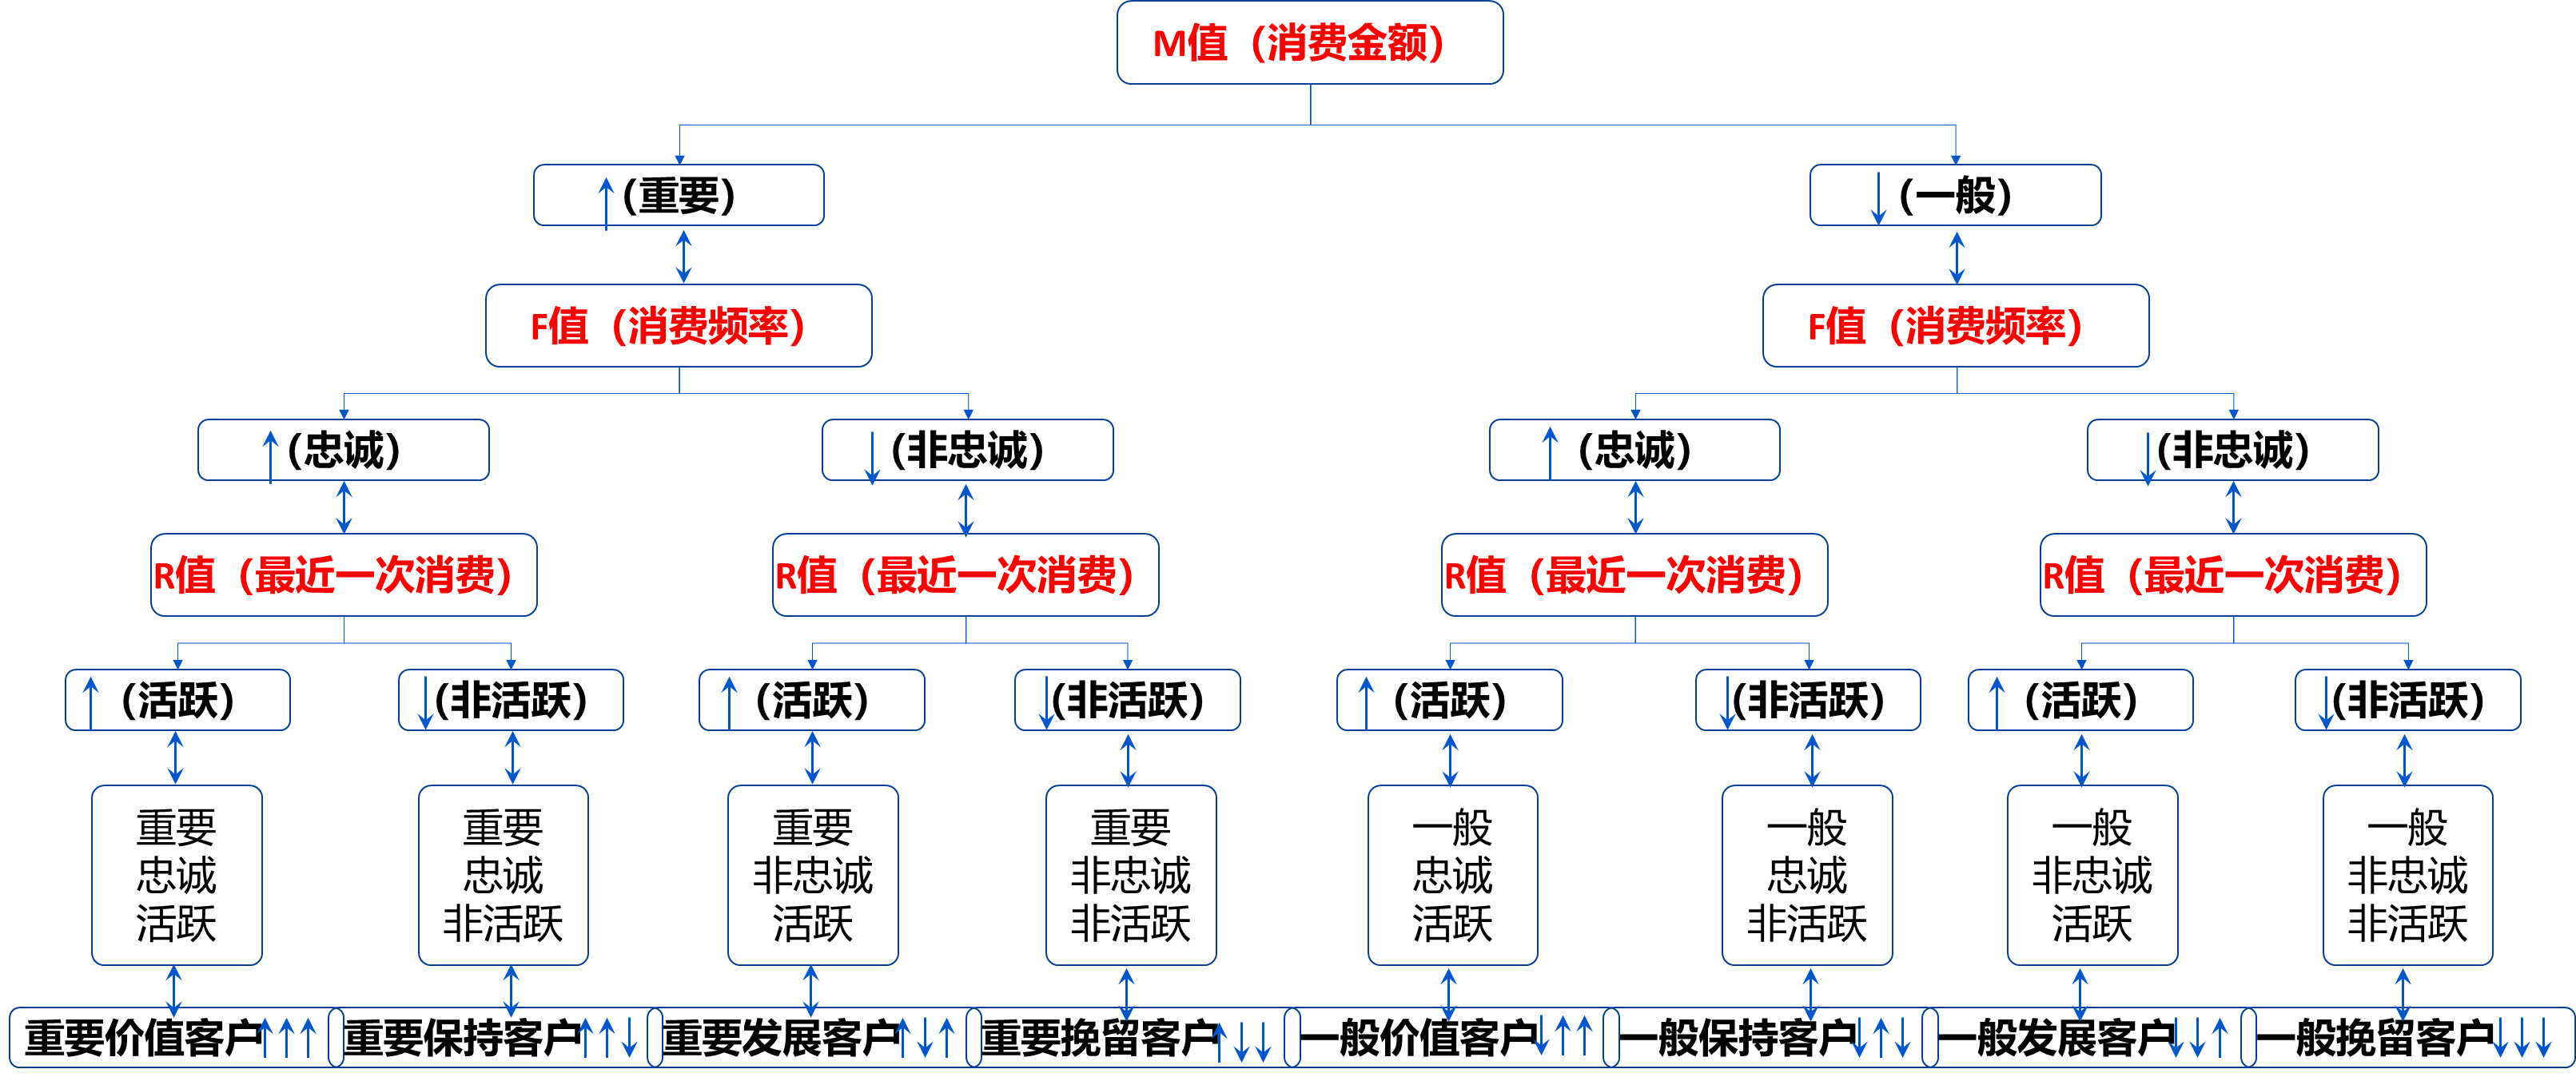
</div>





## EDA探索性数据分析

在销售订单信息表中，以2020-01-01为时间界限向前推固定周期（如1年），得到包含每个客户的客户ID、订单时间、订单金额等信息的原始数据集，一个客户可能会产生多条订单记录。

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

### 导入数据

In [3]:
from ailab import datasets
df=datasets.load_data.get_df(table='sales_order')
df

,Order_ID,Order_Type,Order_Date,User_ID,SKU_ID,Order_status,Pay_type,Pay_account,List_Price,Qty,Amount,Coupons,Promotion,Purchase,Discount_member,Discount_total,Date,Month,Time,Hour
0,96293,2,2019/1/1 0:01,1002915,P00117442,1,2,3.58E+15,608,2,1070.08,100,充1000免100,970.08,88,79.78%,2019/1/1 0:01,1,0:01:00,0
1,31090,2,2019/1/1 12:12,1004746,P00117442,1,2,4.04E+15,608,1,516.8,11,元旦98特惠,505.8,85,83.19%,2019/1/1 12:12,1,12:12:00,12
2,87058,1,2019/1/1 16:48,4191287379,P00117442,1,2,2.71E+15,608,2,1070.08,200,新年首件特惠,870.08,88,71.55%,2019/1/1 16:48,1,16:48:00,16
3,462034,2,2019/1/1 17:15,1005119,P00117442,1,3,3.47E+14,608,1,535.04,12,元旦98特惠,523.04,88,86.03%,2019/1/1 17:15,1,17:15:00,17
4,246885,2,2019/1/1 21:57,1002002,P00117442,1,2,6.01E+15,608,2,1118.72,22,元旦98特惠,1096.72,92,90.19%,2019/1/1 21:57,1,21:57:00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517161,334902,2,2019/12/25 6:51,1003598,P00106342,1,2,2.62E+15,228,1,223.44,None,None,223.44,98,98.00%,2019/12/25 6:51,12,6:51:00,6
517162,376048,2,2019/12/28 1:52,1003860,P00081342,1,1,3.64E+13,538,1,538,None,None,538,100,100.00%,2019/12/28 1:52,12,1:52:00,1
517163,167303,2,2019/12/28 3:24,1001812,P00204042,1,2,4.97E+15,598,1,598,None,None,598,100,100.00%,2019/12/28 3:24,12,3:24:00,3
517164,141467,2,2019/12/30 16:40,1003824,P00150242,1,2,3.57E+15,1180,1,1180,None,None,1180,100,100.00%,2019/12/30 16:40,12,16:40:00,16


### 数据预处理


数据预处理包括数据异常、格式转换和处理。日期转换的目的是实现基于时间间隔的计算，这样才能算出R距离指定日期的天数。转换后的数据通过groupby( )方法实现R、F、M原始数值的计算。


#### 缺失值异常值探索:  

In [4]:
df.info(null_counts=True)
print("-" * 100)

print(df.describe())

/tmp/ipykernel_306448/1852947770.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517166 entries, 0 to 517165
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Order_ID         517166 non-null  object
 1   Order_Type       517166 non-null  object
 2   Order_Date       517164 non-null  object
 3   User_ID          517166 non-null  object
 4   SKU_ID           517166 non-null  object
 5   Order_status     517166 non-null  object
 6   Pay_type         517166 non-null  object
 7   Pay_account      517166 non-null  object
 8   List_Price       517166 non-null  object
 9   Qty              517166 non-null  object
 10  Amount           517166 non-null  object
 11  Coupons          25975 non-null   object
 12  Promotion        25979 non-null   object
 13  Purchase         517166 non-null  object
 14  Discount_member  517166 non-null  object
 15  Discount_total   517166 non-null  object
 16  Date             517164 non-null  object
 17  Month     

#### 数据规约

In [5]:
'''
Order_status 订单状态 1 已完成  2 已取消  3 已退款
'''
data = df[(df.Order_status=='1')&(df.Purchase>'1')][['Order_ID', 'Order_Date', 'User_ID', 'Purchase']].sort_values(by='Order_Date')
data

,Order_ID,Order_Date,User_ID,Purchase
0,96293,2019/1/1 0:01,1002915,970.08
1440,306037,2019/1/1 0:02,1005131,110.8
1674,496419,2019/1/1 0:03,1004416,1234.08
1497,317598,2019/1/1 0:03,1000995,934.88
2517,427057,2019/1/1 0:03,1005755,882.6
...,...,...,...,...
67711,140239,2019/9/9 9:58,1003665,1228.48
62587,528784,2019/9/9 9:59,1003497,1122.88
243163,493086,2019/9/9 9:59,1003922,1298.88
20389,103714,None,4136159682,448


#### 缺失值处理

In [6]:
# data.isnull().sum()

# 查看每一列是否有缺失值
na_cols = data.isnull().any(axis=0)
print(na_cols)
# 查看每一行是否有缺失值
na_rows = data.isnull().any(axis=1)
print(na_rows.sum())
print(data[na_rows])

Order_ID      False
Order_Date     True
User_ID       False
Purchase      False
dtype: bool
2
       Order_ID Order_Date     User_ID Purchase
20389    103714       None  4136159682      448
214274   139877       None  4111956196      328


In [7]:
# 缺失值处理 一共有2条na记录，这些数据在整体样本中占比非常小，可以直接删除。

data.dropna(inplace=True)

#### 格式转换

In [8]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%Y-%m-%d')
data['Date'] = data.Order_Date.dt.date
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Purchase'] = data['Purchase'].astype('float32')
print(data.dtypes)
data

Order_ID              object
Order_Date    datetime64[ns]
User_ID               object
Purchase             float32
Date          datetime64[ns]
dtype: object


,Order_ID,Order_Date,User_ID,Purchase,Date
0,96293,2019-01-01 00:01:00,1002915,970.080017,2019-01-01
1440,306037,2019-01-01 00:02:00,1005131,110.800003,2019-01-01
1674,496419,2019-01-01 00:03:00,1004416,1234.079956,2019-01-01
1497,317598,2019-01-01 00:03:00,1000995,934.880005,2019-01-01
2517,427057,2019-01-01 00:03:00,1005755,882.599976,2019-01-01
...,...,...,...,...,...
5558,345158,2019-09-09 09:53:00,1005113,1008.320007,2019-09-09
275261,391231,2019-09-09 09:54:00,1000195,278.000000,2019-09-09
67711,140239,2019-09-09 09:58:00,1003665,1228.479980,2019-09-09
62587,528784,2019-09-09 09:59:00,1003497,1122.880005,2019-09-09


## 数据准备


原始数据集中没有R、F、M的指标值，需要通过原始数据提取计算，具体的计算方式如下：

- R最近购买时间的间隔，从订单信息中找到会员距离观察结束日期最近的订单时间作为最近购买时间，计算订单日期距离观察窗口结束的天数（单位：天数）。


- F购买频率，以会员ID为维度统计在观察窗口内用户的订单数量作为购买频率（单位：次）。


- M购买金额，以会员ID为维度统计在观察窗口内多个订单的订单金额求和得到总购买商品花费的金额（单位：元）。



In [9]:
# list(data['Date'].groupby(data.User_ID)).max()

In [10]:
 
#计算原始最近一次订单时间
deadline = pd.to_datetime('2020-01-01')
recency = data['Date'].groupby(data.User_ID).max()
# print(recency)

RFM_data = pd.DataFrame()
#计算R的间隔
RFM_data['R_value'] = (deadline-recency).dt.days

#计算原始订单频率
RFM_data['F_value'] = data['Date'].groupby(data.User_ID).nunique()

#计算原始订单总金额
RFM_data['M_value'] = data['Purchase'].groupby(data.User_ID).sum()
print(RFM_data)

            R_value  F_value       M_value
User_ID                                   
1000002           6       53  66311.578125
1000003          48       15  15676.799805
1000004         229        2   2008.080078
1000005           7       79  80638.117188
1000006           2       37  38477.300781
...             ...      ...           ...
4203320135        6        1    338.000000
4203320197      269        1    638.000000
4203320267       36        1    702.239990
4203330031       57        1    631.840027
4203330074       15        1    468.000000

[81888 rows x 3 columns]


In [11]:
RFM_data.describe()

,R_value,F_value,M_value
count,81888.000000,81888.000000,81888.000000
mean,165.375171,5.256643,5753.906250
std,110.302848,21.349406,29116.048828
min,1.000000,1.000000,9.440000
25%,66.000000,1.000000,535.039978
50%,160.000000,1.000000,628.000000
75%,260.000000,1.000000,748.599976
max,365.000000,334.000000,795930.625000


<Figure size 1152x432 with 0 Axes>

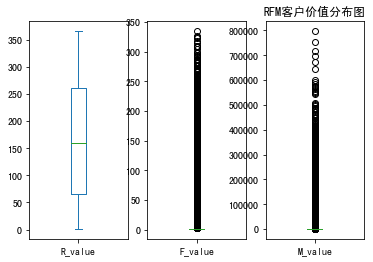

In [12]:
RFM_KM = RFM_data[['R_value', 'F_value', 'M_value']]

plt.figure(figsize=(16, 6))

RFM_KM.plot(kind='box', sharey=False, sharex=False, subplots=True)
plt.title(r"RFM客户价值分布图")
plt.show()

<Figure size 1152x432 with 0 Axes>

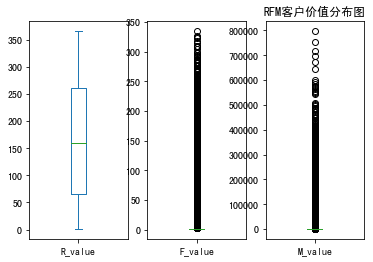

In [13]:
RFM_KM = RFM_data[['R_value', 'F_value', 'M_value']]

plt.figure(figsize=(16, 6))

RFM_KM.plot(kind='box', sharey=False, sharex=False, subplots=True)
plt.title(r"RFM客户价值分布图")
plt.show()

## 客户分层


### 忠诚度阶梯分层法

现在已经得到了RFM模型的R_Value、F_Value、M_Value, 可以将R_Value、F_Value、M_Value进行了五等分切割得到125个RFM魔方块。

<div>
    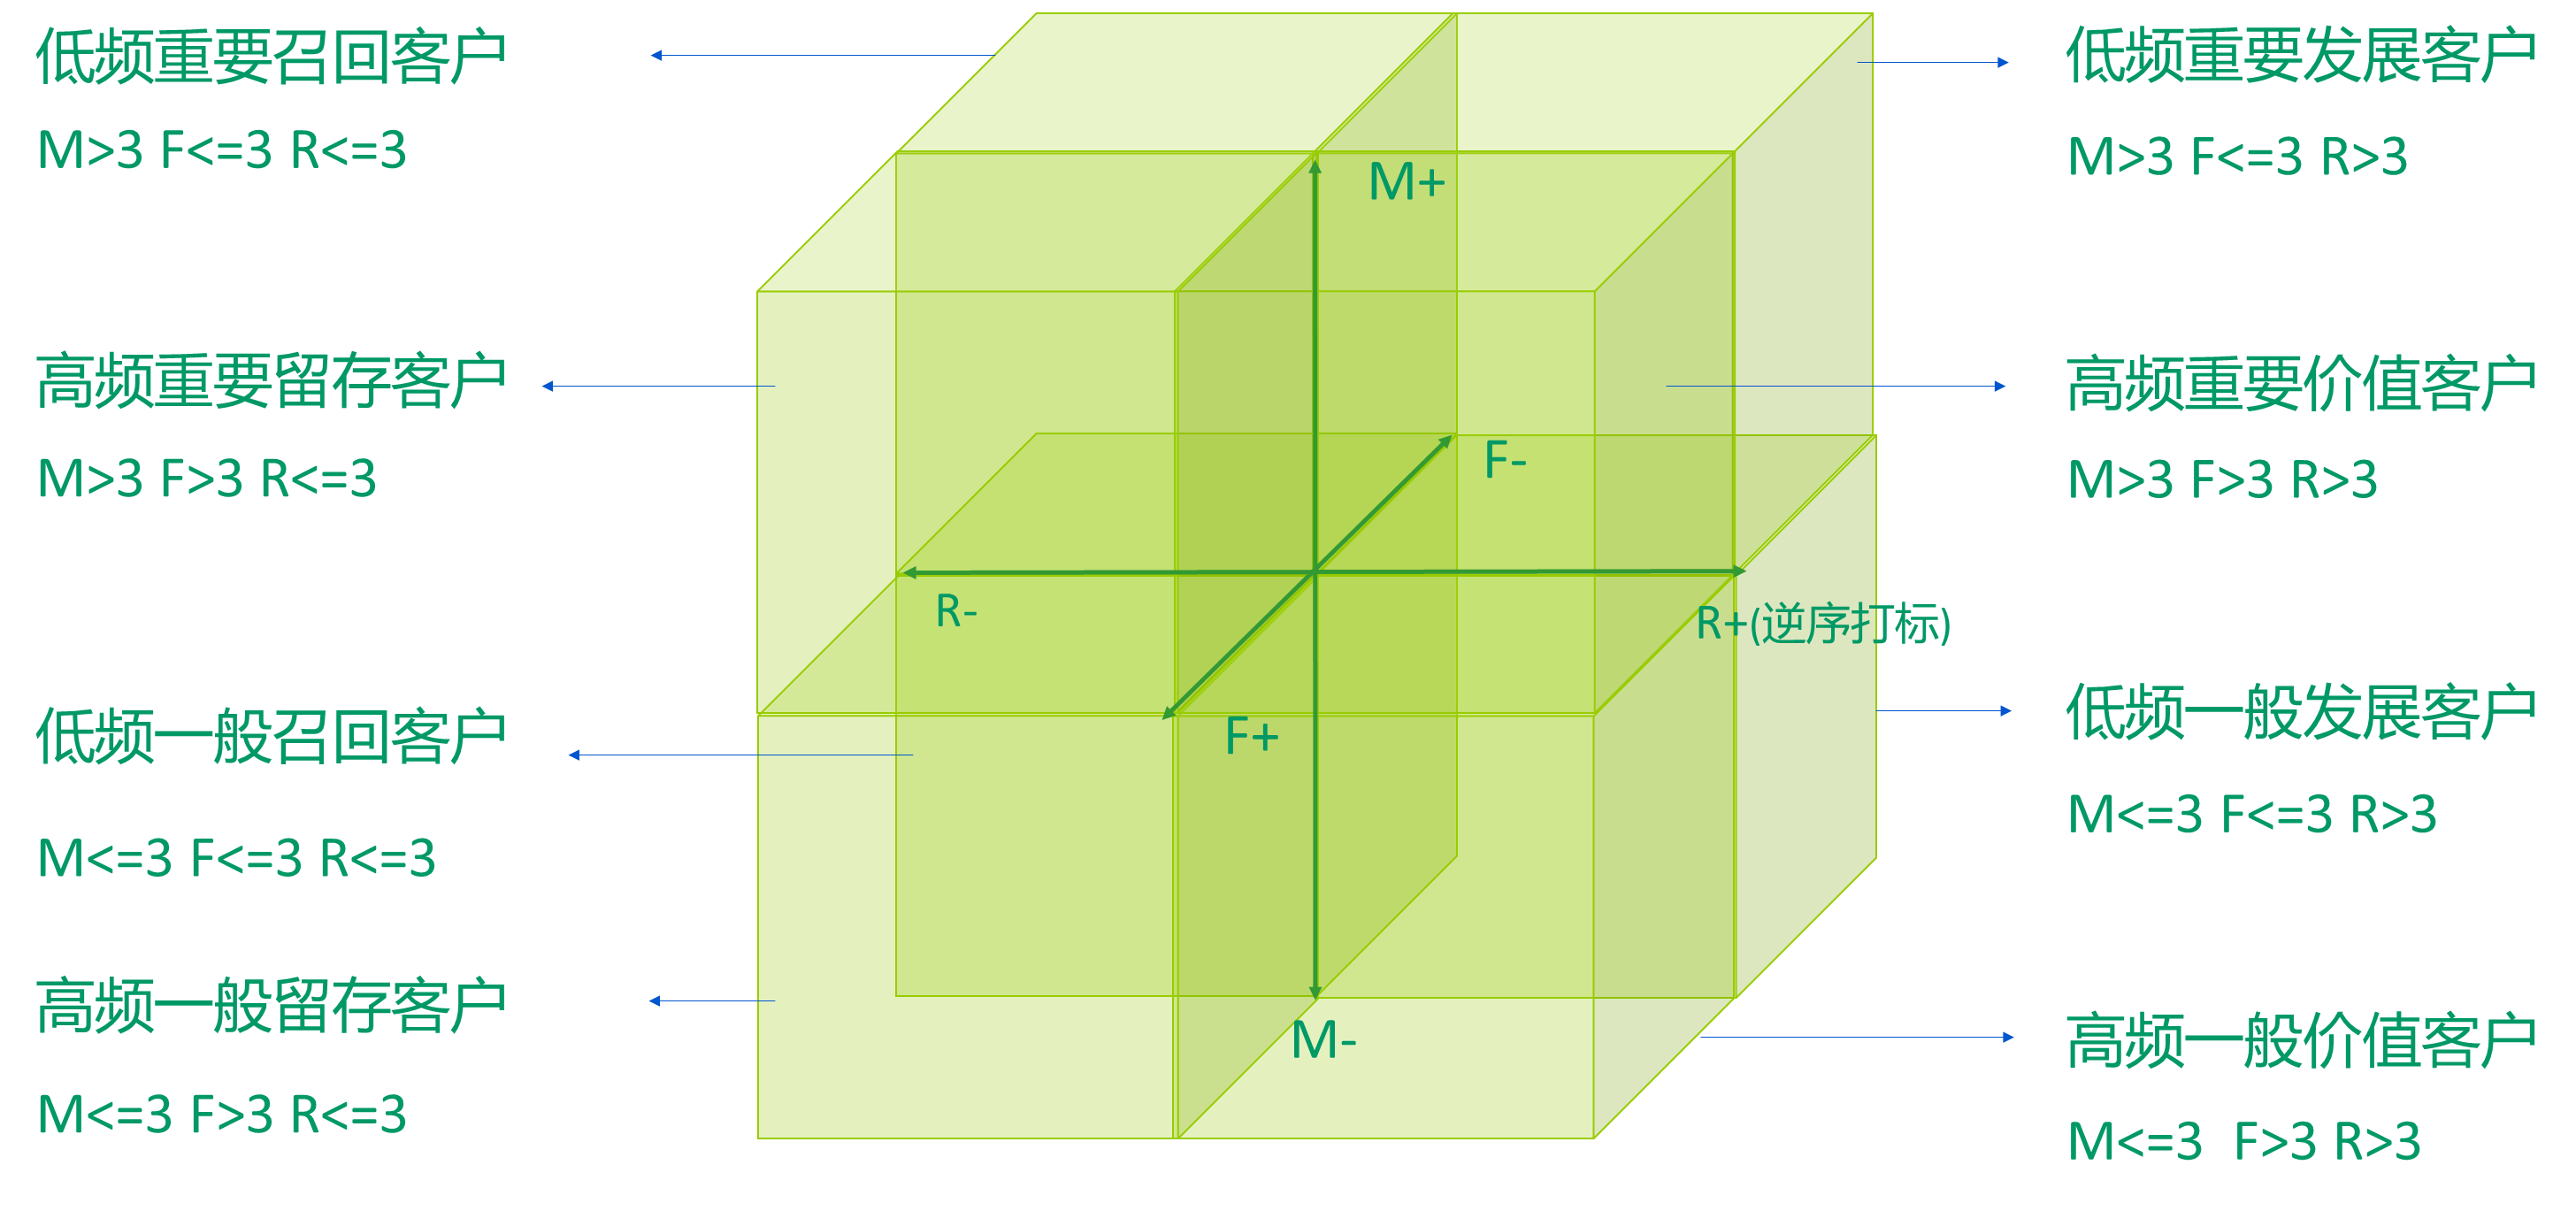
<div>



Pandas.cut()函数

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)


对于F、M变量来讲，值越大代表购买购买频率越高、订单金额越高；但对R来讲，值越小代表离截止时间点越近，因此值越好。

需要注意的是，对于R要倒过来划分，离截止时间越近的值划分越大。

In [14]:
# 分别计算R,F,M得分

RFM_data['R_score'] = pd.cut(RFM_data['R_value'], bins=5, labels=[5, 4, 3, 2, 1])
RFM_data['F_score'] = pd.cut(RFM_data['F_value'], bins=5, labels=[1, 2, 3, 4, 5])
RFM_data['M_score'] = pd.cut(RFM_data['M_value'], bins=5, labels=[1, 2, 3, 4, 5])

In [15]:
def type_(x,R,F,M):
    r,f,m = x[R],x[F],x[M]
    if  f > 3 and m > 3  and r > 3:
        return '高频 重要 高价值客户'
    elif f <= 3 and m > 3 and r > 3 :
         return '低频 重要 发展客户'
    elif r <=3  and f > 3 and m >3 :
         return '高频 重要 留存客户'
    elif r <=3 and f <= 3 and m > 3:
         return '低频 重要 促活召回客户'
    elif r > 3 and f > 3 and m <=3:
        return '高频 一般 价值客户'
    elif r > 3 and f <=3 and m <= 3:
        return '低频 一般 发展客户'
    elif r <= 3 and f > 3 and m <=3:
        return '高频 一般 留存客户'
    elif r  <= 3 and f <= 3 and m <= 3:
        return '低频 一般 召回客户'
    else:
        return 


RFM_data['type'] = RFM_data.apply(type_, args=('R_score', 'F_score', 'M_score'), axis=1)

In [16]:
RFM_data.sort_values(by=['M_score', 'F_score', 'R_score'], ascending=False)

,R_value,F_value,M_value,R_score,F_score,M_score,type
User_ID,,,,,,,
1000889,1,325,643116.312500,5,5,5,高频 重要 高价值客户
1001181,1,325,674179.375000,5,5,5,高频 重要 高价值客户
1001680,1,323,795930.625000,5,5,5,高频 重要 高价值客户
1001941,1,334,696725.687500,5,5,5,高频 重要 高价值客户
1003618,1,326,715015.187500,5,5,5,高频 重要 高价值客户
...,...,...,...,...,...,...,...
4203320059,28,1,838.000000,5,1,1,低频 一般 发展客户
4203320135,6,1,338.000000,5,1,1,低频 一般 发展客户
4203320267,36,1,702.239990,5,1,1,低频 一般 发展客户


### 计算RFM总得分


对于RFM总得分的计算有两种方法，一种是根据R、F、M三个值的权重系数求得一个新的汇总值，例如RFM得分为6、9、6；另外一种是直接将三个值直接拼接到一起，例如RFM得分为312、333、132；

In [17]:
#计算RFM得分,设定R、F、M的权重系数，根据系数进行加权得分
RFM_data['R_score'] = RFM_data['R_score'].astype('float32')
RFM_data['F_score'] = RFM_data['F_score'].astype('float32')
RFM_data['M_score'] = RFM_data['M_score'].astype('float32')

RFM_data['RFM_score'] = 0.73*RFM_data['M_score']+0.19*RFM_data['F_score']+0.08*RFM_data['R_score']
RFM_data

,R_value,F_value,M_value,R_score,F_score,M_score,type,RFM_score
User_ID,,,,,,,,
1000002,6,53,66311.578125,5.0,1.0,1.0,低频 一般 发展客户,1.32
1000003,48,15,15676.799805,5.0,1.0,1.0,低频 一般 发展客户,1.32
1000004,229,2,2008.080078,2.0,1.0,1.0,低频 一般 召回客户,1.08
1000005,7,79,80638.117188,5.0,2.0,1.0,低频 一般 发展客户,1.51
1000006,2,37,38477.300781,5.0,1.0,1.0,低频 一般 发展客户,1.32
...,...,...,...,...,...,...,...,...
4203320135,6,1,338.000000,5.0,1.0,1.0,低频 一般 发展客户,1.32
4203320197,269,1,638.000000,2.0,1.0,1.0,低频 一般 召回客户,1.08
4203320267,36,1,702.239990,5.0,1.0,1.0,低频 一般 发展客户,1.32


### 数据解读及应用

基于三个维度值做用户群体划分和解读，对用户的价值度做分析。例如得分为212的会员往往购买频率较低，针对购买频率低的客户定期发送促销活动邮件；针对得分为321的会员虽然购买频率高但是订单金额低等，这些客户往往具有较高的购买粘性，可以考虑通过关联或搭配销售的方式提升订单金额。

基于RFM汇总得分评估所有会员的价值度价值，并可以做价值度排名；同时，该得分可以作为输入维度跟其他维度一起作为其他数据分析和挖掘模型的输入变量，为分析建模提供基础。

## 基于K-Means 客户分类

K-Means聚类分析是一种基于质心的划分方法，给聚类格式k，以及包含n个数据对象的数据库，输入满足误差平方和最小标准的k个聚类。

sklearn的cluster模块提供了KMeans函数来构建K-Means聚类模型，可以直接使用，算法收敛阀值采用默认0.0001。由于聚类分析不需要划分数据集为训练集和测试集，标准化可以使用sklearn的preprocessing 模块，也可以使用自定以函数的方法实现

### 数据可视化

<Figure size 1152x432 with 0 Axes>

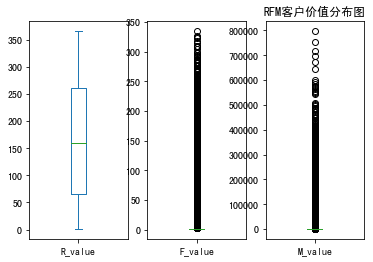

In [18]:
RFM_KM = RFM_data[['R_value', 'F_value', 'M_value']]

plt.figure(figsize=(16, 6))

RFM_KM.plot(kind='box', sharey=False, sharex=False, subplots=True)
plt.title(r"RFM客户价值分布图")
plt.show()

### 数据标准化处理

#### Standardization标准化

将特征数据的分布调整成标准正太分布，也叫高斯分布，也就是使得数据的均值维0，方差为1.

标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。标准化的过程为两步：去均值的中心化（均值变为0）；方差的规模化（方差变为1）。


In [19]:
#数据标准化处理
import sklearn.preprocessing as sp

ss = sp.StandardScaler()

RFM_ss = ss.fit_transform(RFM_KM)
RFM_ss

array([[-1.44489601,  2.23629866,  2.07963341],
       [-1.06412382,  0.4563788 ,  0.34076909],
       [ 0.57682298, -0.15254116, -0.12863257],
       ...,
       [-1.17291587, -0.19938115, -0.17347682],
       [-0.98252978, -0.19938115, -0.17589444],
       [-1.36330197, -0.19938115, -0.18152092]])

In [20]:
(RFM_KM-RFM_KM.mean())/RFM_KM.std()

,R_value,F_value,M_value
User_ID,,,
1000002,-1.444887,2.236285,2.079873
1000003,-1.064117,0.456376,0.340805
1000004,0.576819,-0.152540,-0.128652
1000005,-1.435821,3.454117,2.571922
1000006,-1.481151,1.486850,1.123895
...,...,...,...
4203320135,-1.444887,-0.199380,-0.186011
4203320197,0.939457,-0.199380,-0.175707
4203320267,-1.172909,-0.199380,-0.173501


In [21]:
RFM_ss.mean()

-9.16291921847726e-17

In [22]:
RFM_ss.var()

1.0

In [23]:
ss.inverse_transform(RFM_ss)

array([[6.00000000e+00, 5.30000000e+01, 6.63115781e+04],
       [4.80000000e+01, 1.50000000e+01, 1.56767998e+04],
       [2.29000000e+02, 2.00000000e+00, 2.00808008e+03],
       ...,
       [3.60000000e+01, 1.00000000e+00, 7.02239990e+02],
       [5.70000000e+01, 1.00000000e+00, 6.31840027e+02],
       [1.50000000e+01, 1.00000000e+00, 4.68000000e+02]])

In [24]:
RFM_ss

array([[-1.44489601,  2.23629866,  2.07963341],
       [-1.06412382,  0.4563788 ,  0.34076909],
       [ 0.57682298, -0.15254116, -0.12863257],
       ...,
       [-1.17291587, -0.19938115, -0.17347682],
       [-0.98252978, -0.19938115, -0.17589444],
       [-1.36330197, -0.19938115, -0.18152092]])

#### MinMaxScaler范围缩放

统一样本矩阵中不同特征的最大值和最小值范围。将属性缩放到一个指定的最大和最小值（通常是1-0）之间，这样处理可对方差非常小的属性增强其稳定性，也可维持稀疏矩阵中为0的条目


In [25]:
#数据归一化处理

import sklearn.preprocessing as sp
import numpy as np

data=sp.MinMaxScaler(feature_range=(0, 1)).fit_transform(RFM_KM)
# np.savez('data.npz',data)
# print('标准化后的三个特征为：\n',data[:5])
data

array([[1.37362637e-02, 1.56156156e-01, 8.33023915e-02],
       [1.29120879e-01, 4.20420420e-02, 1.96845619e-02],
       [6.26373626e-01, 3.00300300e-03, 2.51110300e-03],
       ...,
       [9.61538462e-02, 0.00000000e+00, 8.70437932e-04],
       [1.53846154e-01, 0.00000000e+00, 7.81987010e-04],
       [3.84615385e-02, 0.00000000e+00, 5.76137448e-04]])

### 模型识别


#### 手肘法

In [26]:
from sklearn.cluster import KMeans
SSE = []

for k in range(2, 9):
    km_model = KMeans(n_clusters=k)
    km_model.fit(RFM_ss)
    SSE.append(km_model.inertia_)

SSE

[123970.34604691507,
 63923.26462435249,
 39263.44571296086,
 28837.705239099694,
 19785.033329055193,
 15571.388945799803,
 12098.243426359199]

<function matplotlib.pyplot.show(close=None, block=None)>

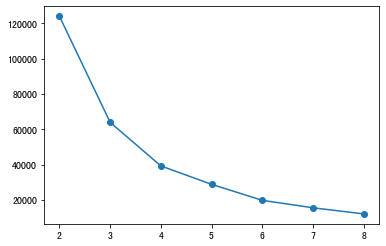

In [27]:
plt.plot(range(2, 9), SSE, 'o-')
plt.show

#### 轮廓系数法

In [29]:
from sklearn.metrics import silhouette_score

silhouetteScore = []
for k in range(2, 5):
    km_model = KMeans(n_clusters=k)
    km_model.fit(RFM_ss)
    score = silhouette_score(RFM_ss, km_model.labels_)
    silhouetteScore.append(score)


silhouetteScore

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1639, 81888) and data type float64

### 构建模型

In [98]:
#从sklearn.cluster模块加载k-means聚类模型进行机器学习

k = 6
km_model = KMeans(n_clusters=k)
km_model.fit(RFM_ss)

#查看聚类中心和对应的类别
print(km_model.cluster_centers_)
print(km_model.labels_)

[[-0.98998324 -0.1319653  -0.12793734]
 [-1.43139601  2.24989931  1.82229046]
 [ 1.25116039 -0.19809662 -0.17670013]
 [-1.4847378  10.67270248 12.16496304]
 [ 0.12665806 -0.19385232 -0.17436695]
 [-1.47252007  5.98616033  5.41789889]]
[1 0 4 ... 0 0 0]


### 输出各个特征的的聚类中心和各个类别的样本数量

In [99]:
RFM_KM

,R_value,F_value,M_value
User_ID,,,
1000002,6,53,66311.578125
1000003,48,15,15676.799805
1000004,229,2,2008.080078
1000005,7,79,80638.117188
1000006,2,37,38477.300781
...,...,...,...
4203320135,6,1,338.000000
4203320197,269,1,638.000000
4203320267,36,1,702.239990


In [100]:
df_km = pd.DataFrame(km_model.cluster_centers_)
df_km.columns = RFM_KM.columns

df_km['样本数量'] = pd.Series(km_model.labels_).value_counts()
df_km

,R_value,F_value,M_value,样本数量
0,-0.989983,-0.131965,-0.127937,28757
1,-1.431396,2.249899,1.822290,2340
2,1.251160,-0.198097,-0.176700,24249
3,-1.484738,10.672702,12.164963,261
4,0.126658,-0.193852,-0.174367,25365
5,-1.472520,5.986160,5.417899,916


In [101]:
RFM_data['KM_level'] = km_model.labels_
RFM_data

,R_value,F_value,M_value,R_score,F_score,M_score,type,RFM_score,KM_level
User_ID,,,,,,,,,
1000002,6,53,66311.578125,5.0,1.0,1.0,低频 一般 发展客户,1.32,1
1000003,48,15,15676.799805,5.0,1.0,1.0,低频 一般 发展客户,1.32,0
1000004,229,2,2008.080078,2.0,1.0,1.0,低频 一般 召回客户,1.08,4
1000005,7,79,80638.117188,5.0,2.0,1.0,低频 一般 发展客户,1.51,1
1000006,2,37,38477.300781,5.0,1.0,1.0,低频 一般 发展客户,1.32,1
...,...,...,...,...,...,...,...,...,...
4203320135,6,1,338.000000,5.0,1.0,1.0,低频 一般 发展客户,1.32,0
4203320197,269,1,638.000000,2.0,1.0,1.0,低频 一般 召回客户,1.08,2
4203320267,36,1,702.239990,5.0,1.0,1.0,低频 一般 发展客户,1.32,0


### 聚类结果可视化

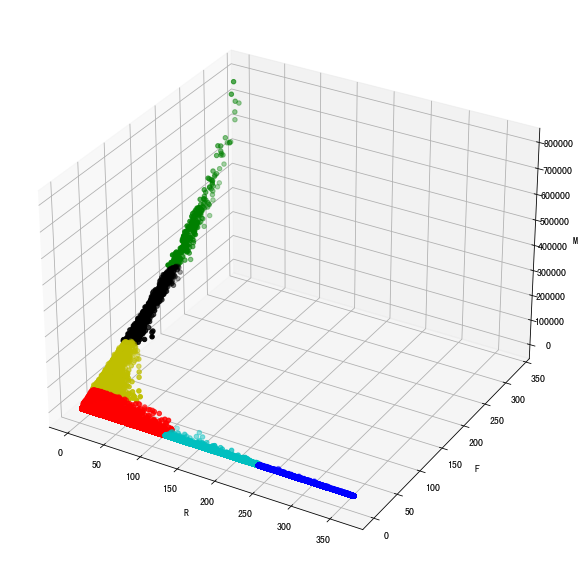

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inine
# %matplotlib notebook 

plt.figure(figsize=(10, 12))

data0 = RFM_data[RFM_data.KM_level== 0]
data1 = RFM_data[RFM_data.KM_level== 1]
data2 = RFM_data[RFM_data.KM_level== 2]
data3 = RFM_data[RFM_data.KM_level== 3]
data4 = RFM_data[RFM_data.KM_level== 4]
data5 = RFM_data[RFM_data.KM_level== 5]

ax = plt.subplot(111, projection='3d')

ax.scatter(data0['R_value'],  data0['F_value'], data0['M_value'], c='r')
ax.scatter(data1['R_value'],  data1['F_value'], data1['M_value'], c='y')
ax.scatter(data2['R_value'],  data2['F_value'], data2['M_value'], c='b')
ax.scatter(data3['R_value'],  data3['F_value'], data3['M_value'], c='g')
ax.scatter(data4['R_value'],  data4['F_value'], data4['M_value'], c='c')
ax.scatter(data5['R_value'],  data5['F_value'], data5['M_value'], c='k')

ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')


plt.grid()
plt.show()

In [103]:
pd.DataFrame(ss.inverse_transform(km_model.cluster_centers_))

,0,1,2
0,56.177867,2.439280,2028.324635
1,7.489079,53.290364,58817.892087
2,303.380882,1.027424,608.378754
3,1.605364,233.111111,359990.863745
4,179.345831,1.118037,676.319770
5,2.953005,133.056831,163520.044023


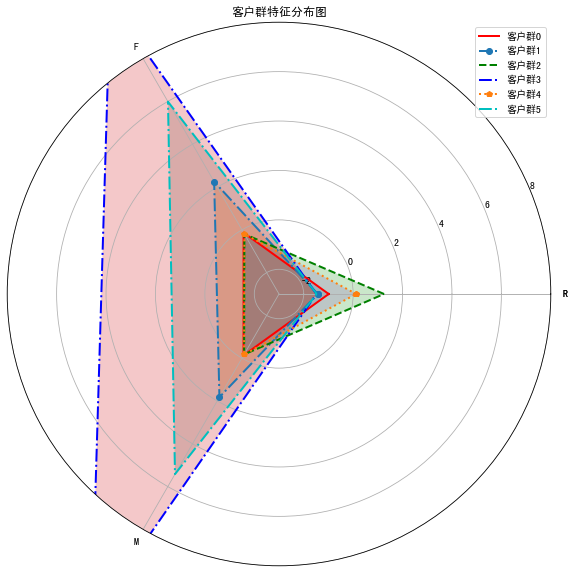

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# kmeans_model.cluster_centers_：kmeans聚类后的聚类中心
N = len(km_model.cluster_centers_[0])# 聚类中心的属性长度

angles=np.linspace(0, 2*np.pi, N, endpoint=False) # 设置雷达图的角度，用于平分切开一个圆面
# # 设置各指标名称
labels = ['R','F','M']   
angles=np.concatenate((angles, [angles[0]])) # 为了使雷达图一圈封闭起来
labels=np.concatenate((labels,[labels[0]]))  #对labels进行封闭

fig = plt.figure(figsize=(10,10)) # 设置画布大小
ax = fig.add_subplot(111, polar=True) # 这里一定要设置为极坐标格式
sam = ['r-', 'o-.', 'g--', 'b-.', 'p:','c-.', 'k--', 'm:'] # 样式

lab = [] # 图例标签名
for i in range(len(km_model.cluster_centers_)):
    values=km_model.cluster_centers_[i]
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    values=np.concatenate((values,[values[0]]))
    ax.plot(angles, values, sam[i], linewidth=2) # 绘制折线图
    ax.fill(angles, values, alpha=0.25) # 填充颜色
    ax.set_thetagrids(angles * 180/np.pi, labels) # 添加每个特征的标签
    ax.set_ylim(-3, 8) # 设置雷达图的范围
    plt.title('客户群特征分布图') # 添加标题
    ax.grid(True) # 添加网格线
    lab.append('客户群'+str(i))
    

plt.legend(lab)
plt.savefig("./RFM客户群特征分布图.jpg") 
plt.show() # 显示图形

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

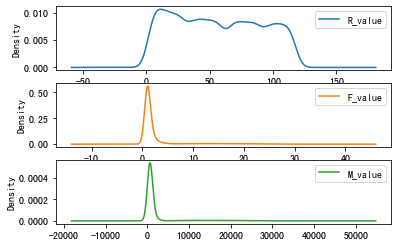

In [105]:
# plt.reParams['figure.figsize'] = (16, 8)

RFM_data[RFM_data['KM_level']==0][['R_value', 'F_value', 'M_value']].plot(kind='kde', subplots=True, sharex=False)